Sa se foloseasca un algoritm de clasificare a imaginilor (etapa de inferenta/testare) si sa se stabileasca performanta acestui algoritm de clasificare binara (imagini cu biciclete vs. imagini fara biciclete).

In [ ]:
from PIL.ImageOps import contain
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from matplotlib import pyplot as plt
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time

os.environ["VISION_KEY"] ="Key"
os.environ["VISION_ENDPOINT"] ="api"
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

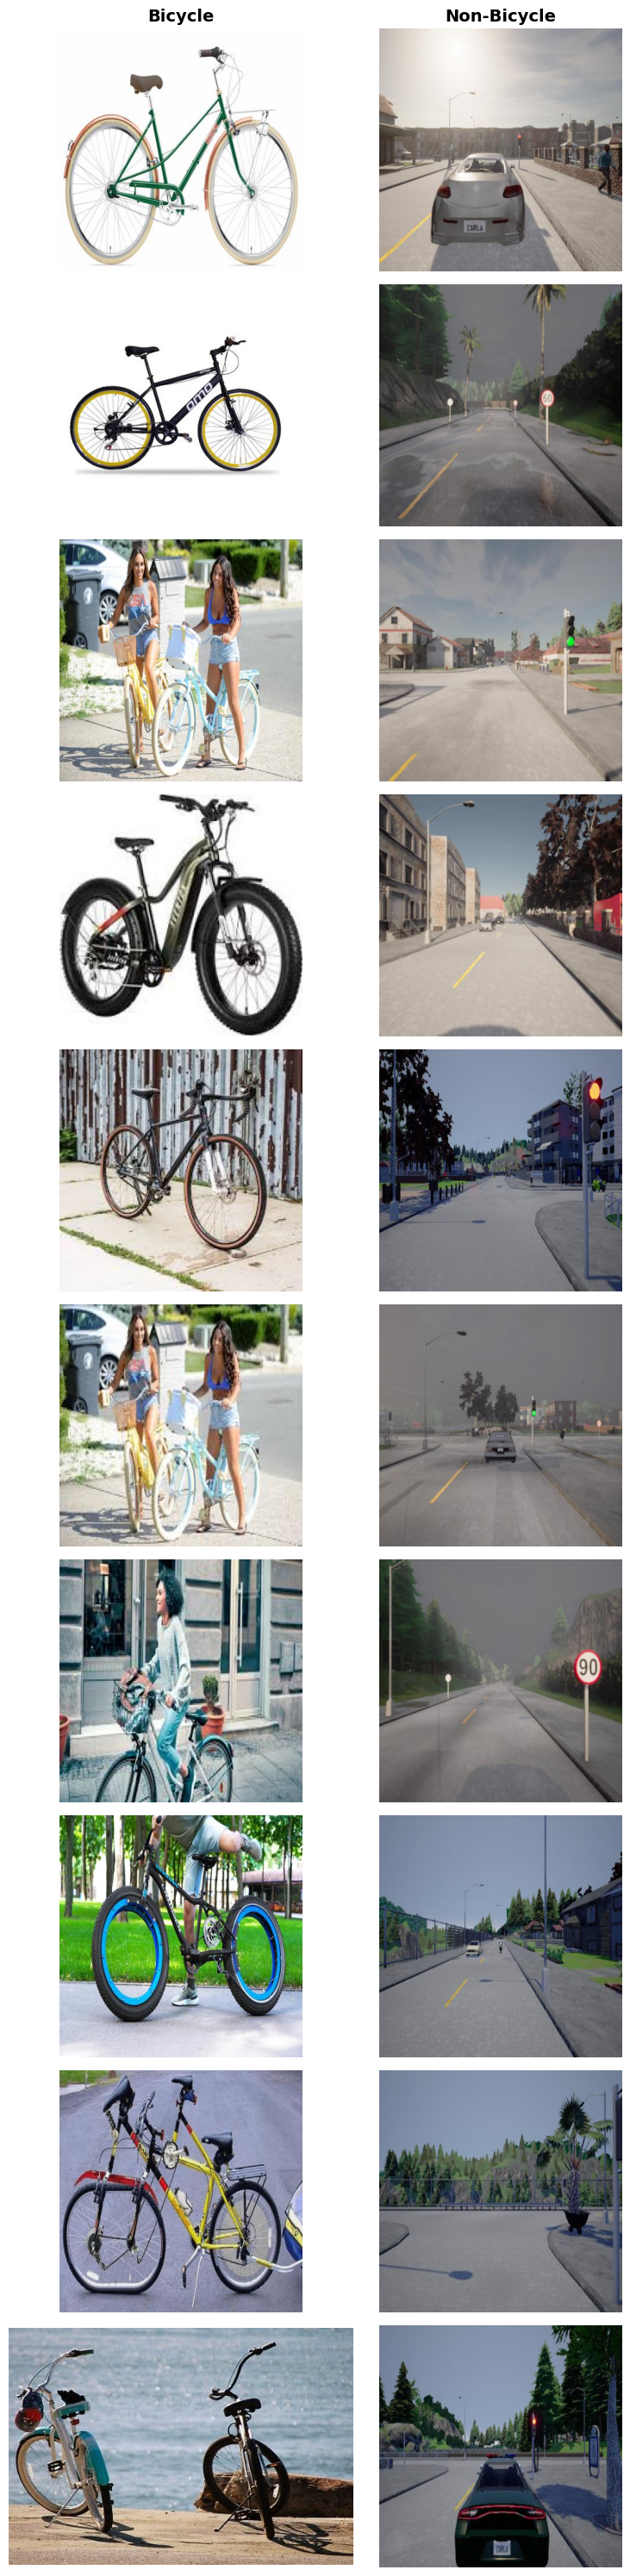

In [2]:
folder_path = "images/bikes/"
files = os.listdir(folder_path)

bicycle_prediction = []
non_bicycle_prediction = []

for file in files:
    file_path = os.path.join(folder_path, file)
    img = plt.imread(file_path)
    img_binaries = open(file_path, "rb")
    result = computervision_client.analyze_image_in_stream(img_binaries, visual_features=[VisualFeatureTypes.tags])
    ok = False
    for tag in result.tags:
        if "bicycle" in tag.name:
            ok = True
            break
    if ok:
        bicycle_prediction.append(file)
    else:
        non_bicycle_prediction.append(file)

max_length = max(len(bicycle_prediction), len(non_bicycle_prediction))
bicycle_prediction += [""] * (max_length - len(bicycle_prediction))
non_bicycle_prediction += [""] * (max_length - len(non_bicycle_prediction))

fig, axes = plt.subplots(nrows=max_length, ncols=2, figsize=(8, max_length * 3))
axes[0, 0].set_title("Bicycle", fontsize=14, fontweight="bold")
axes[0, 1].set_title("Non-Bicycle", fontsize=14, fontweight="bold")

for i in range(max_length):
    if bicycle_prediction[i]:
        path = os.path.join(folder_path, bicycle_prediction[i])
        img = plt.imread(path)
        axes[i, 0].imshow(img)
    axes[i, 0].axis("off")

    if non_bicycle_prediction[i]:
        path = os.path.join(folder_path, non_bicycle_prediction[i])
        img = plt.imread(path)
        axes[i, 1].imshow(img)
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()